
***
# Traffic Sign Classifier  
---
## Overview 
---
***
We are in the era of self-driving cars recognizing and classifying traffic signs is of utmost importance. The model analyzes the properties of traffic sign images and recognizing the traffic signs out of them. Identifying the traffic signs correctly and taking actions is crucial to the operation of autonomous vehicles this process of classification of traffic sign would help safe driving and help preventing the accidents.

---
## Step 0: Load The Data

In [37]:
# Load Some useful Libraries
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
import MyAlexNet
import DataAugmentation as func
import glob
import csv



In [38]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train, X_train_size, X_train_bbox = train['features'], train['labels'], train['sizes'], train['coords']
X_valid, y_valid, X_valid_size, X_valid_bbox = valid['features'], valid['labels'], valid['sizes'], valid['coords']
X_test, y_test, X_test_size, X_test_bbox = test['features'], test['labels'], test['sizes'], test['coords']
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_valid Shape:", X_valid.shape)
print("y_valid Shape:", y_valid.shape)
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (34799, 32, 32, 3)
y_train Shape: (34799,)
X_valid Shape: (4410, 32, 32, 3)
y_valid Shape: (4410,)
X_train Shape: (34799, 32, 32, 3)
y_train Shape: (34799,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



In [39]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


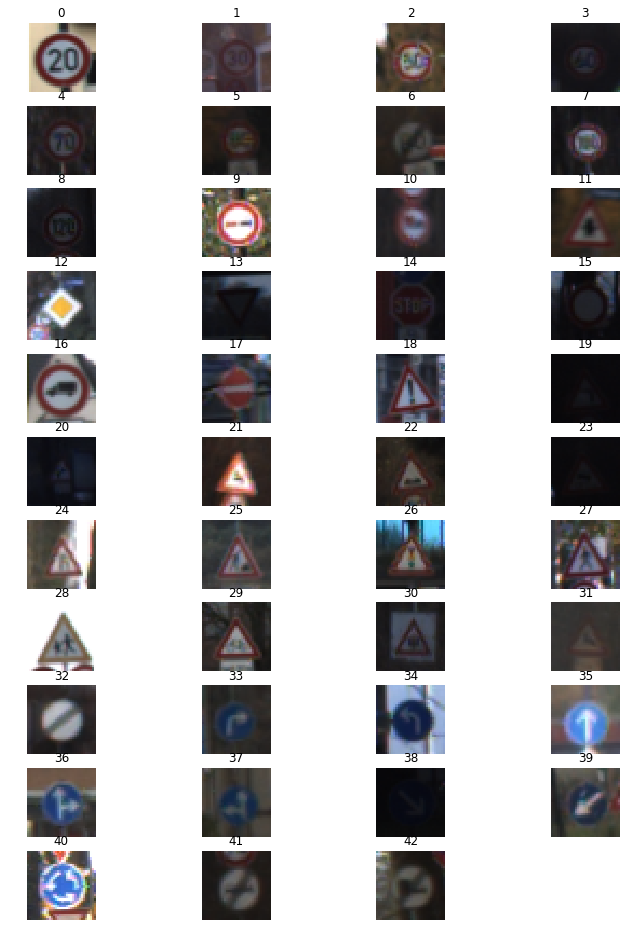

In [40]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

num_of_samples = []
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i + 1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :])  # draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()



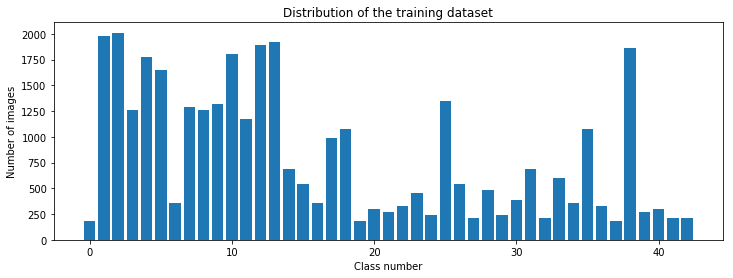

Min number of images in training data per class = 180
Max number of images in training data per class = 2010


In [41]:
# Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images in training data per class =", min(num_of_samples))
print("Max number of images in training data per class =", max(num_of_samples))

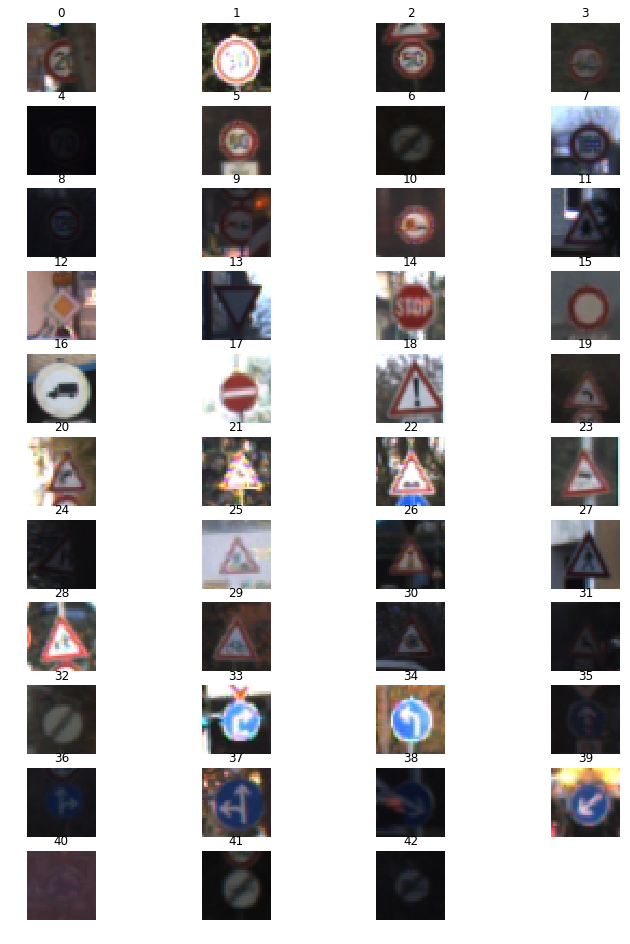

In [42]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

num_of_samples = []
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i + 1)
    x_selected = X_valid[y_valid == i]
    plt.imshow(x_selected[0, :, :, :])  # draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()




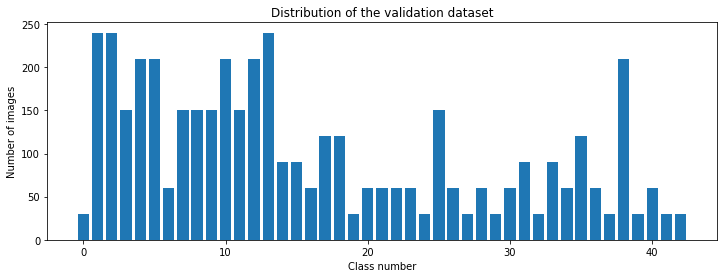

Min number of images in vlidation data per class = 30
Max number of images in validation data per class = 240


In [43]:
# Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the validation dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images in vlidation data per class =", min(num_of_samples))
print("Max number of images in validation data per class =", max(num_of_samples))

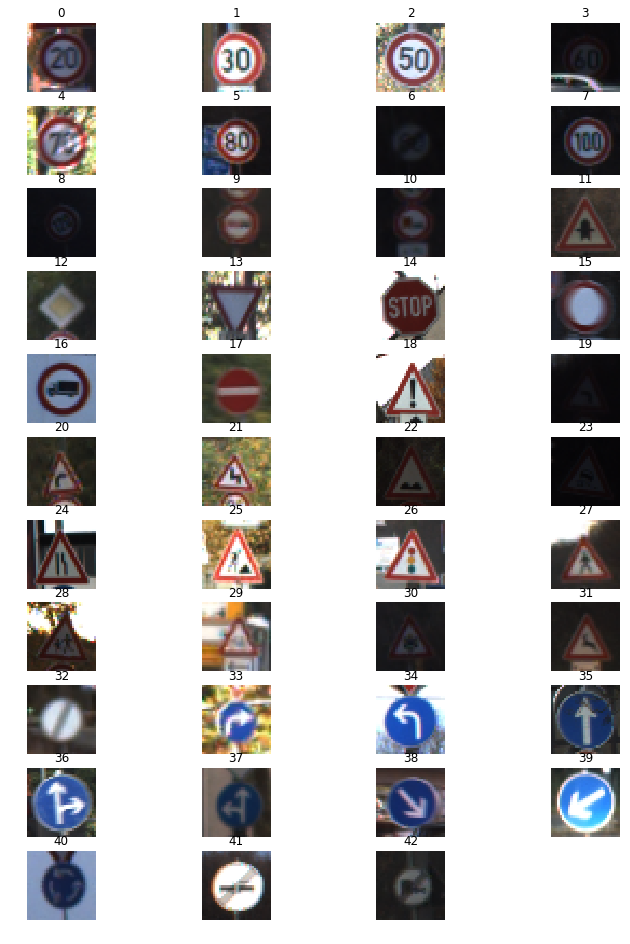

In [44]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

num_of_samples = []
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i + 1)
    x_selected = X_test[y_test == i]
    plt.imshow(x_selected[0, :, :, :])  # draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

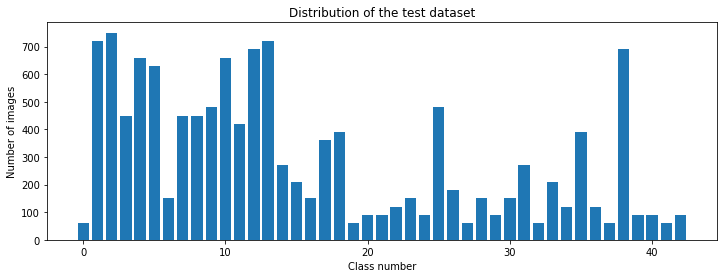

Min number of images in test data per class = 60
Max number of images in test data per class = 750


In [45]:
# Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the test dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images in test data per class =", min(num_of_samples))
print("Max number of images in test data per class =", max(num_of_samples))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

## Data Augementation 


I did some random data generation. 5 images were generated adn than were saved in a pickle format. Also I updated the data from 32x32x3 to 51x51x3 to work efficiently with my designed cnn architecture.

In [46]:
def show_imgs(source_img, source_img1, source_img2):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(source_img)
    plt.title("Raw image")
    plt.subplot(1, 3, 2)
    plt.imshow(source_img1)
    plt.title("Processed image")
    plt.subplot(1, 3, 3)
    plt.imshow(source_img2)
    plt.title("Augmented image")
    plt.show()  
    print(source_img.shape)
    print(source_img1.shape)
    print(source_img2.shape)
def crop_img(source_img):
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE),
                                    tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # Each image is resized individually as different image may be of different size.
        img = source_img # Do not read alpha channel.
        resized_img = sess.run(tf_img, feed_dict = {X: img})
    resized_img = np.array(resized_img, dtype = np.uint8) # Convert to numpy
    return resized_img
def sharpen_img(source_img):
    gb = cv2.GaussianBlur(source_img, (5,5), 0)
    return cv2.addWeighted(source_img, 2, gb, -1, 0)
def scale_img(source_img):
    img2=source_img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(source_img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    c_x,c_y, sh = int(img2.shape[0]/2), int(img2.shape[1]/2), int(img2.size/2)
    return source_img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]
def rotate_img(source_img):
    c_x,c_y = int(source_img.shape[0]/2), int(source_img.shape[1]/2)
    ang = 40.0*np.random.rand()-20
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(source_img, Mat, source_img.shape[:2])
def increase_brightness_img(source_img, value=5):
    hsv = cv2.cvtColor(source_img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
def contrast_img(source_img):
    lab= cv2.cvtColor(source_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
def translate_img(source_img):
    rows,cols,_ = source_img.shape
    # allow translation up to px pixels in x and y directions
    px = 6
    dx,dy = np.random.randint(-px,px,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(source_img,M,(cols,rows))
    return dst
def transform_img(source_img):
    return sharpen_img(
            contrast_img(
                    increase_brightness_img(
                            crop_img(
                                    source_img
                                              ))))
def augment_img(source_img):
    return transform_img(
            scale_img(
                    translate_img(
                            rotate_img(
                                       source_img
                                                 ))))


In [ ]:
X_train_aug = []
y_train_aug = []
def create_data(n):
    for i in range(n_train):
        img=X_train[i]
        X_train_aug.append(img)
        y_train_aug.append(y_train[i])
        #Generate n new images out of each input image
        for j in range(n):
            X_train_aug.append(augment_img(img))
            y_train_aug.append(y_train[i])

In [11]:
filename = "updated_test.p"
file = open(filename, 'rb')
X_test = pickle.load(file)

filename = "AugmentedData_X.p"
file = open(filename, 'rb')
X_train = pickle.load(file)
filename = "AugmentedData_Y.p"
file=open(filename,'rb')
y_train= pickle.load(file)

filename = "updated_valid.p"
file = open(filename, 'rb')
X_valid = pickle.load(file)


In [12]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_valid Shape:", X_valid.shape)
print("y_valid Shape:", y_valid.shape)
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (208794, 51, 51, 3)
y_train Shape: (208794,)
X_valid Shape: (4410, 51, 51, 3)
y_valid Shape: (4410,)
X_train Shape: (208794, 51, 51, 3)
y_train Shape: (208794,)


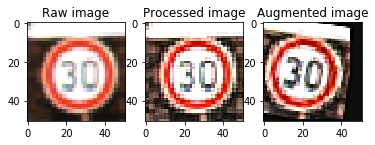

(51, 51, 3)
(51, 51, 3)
(51, 51, 3)


In [23]:
test = X_train[3000]
transformation = func.transform_img(test)
augmentation = func.augment_img(test)
func.show_imgs(test, transformation, augmentation)


Note: data Augmentation didn't helped me at all it decreased the accuracy of my model. I haven't used it for my training process so switching back to my resized original data.

In [47]:
filename = "updated_test.p"
file = open(filename, 'rb')
X_test = pickle.load(file)

filename = "updated_train.p"
file = open(filename, 'rb')
X_train = pickle.load(file)

filename = "updated_valid.p"
file = open(filename, 'rb')
X_valid = pickle.load(file)

In [50]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_valid Shape:", X_valid.shape)
print("y_valid Shape:", y_valid.shape)
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (34799, 51, 51, 3)
y_train Shape: (34799,)
X_valid Shape: (4410, 51, 51, 3)
y_valid Shape: (4410,)
X_train Shape: (34799, 51, 51, 3)
y_train Shape: (34799,)


## Data Normalizarion
Data Normalization is very important in training of the neural network. I trained my model without normalizing the data and got 83% of accuracy and than just after normalization and training got 95% accuracy.

In [51]:
# Data Normalization
print(np.mean(X_train))
X_train = (X_train - np.mean(X_train)) / 255.0
print(np.mean(X_train))


82.8398695959
2.76022909371e-17


In [52]:
print(np.mean(X_valid))
X_valid = (X_valid - np.mean(X_valid)) / 255.0
print(np.mean(X_valid))


83.712646511
6.28575547718e-17


In [53]:
print(np.mean(X_test))
X_test = (X_test - np.mean(X_test)) / 255.0
print(np.mean(X_test))


82.2908772932
1.9495390271e-18


In [54]:
## Shuffle the training dataset

X_train, y_train = shuffle(X_train, y_train)
print('done')


done


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

My dataset preprocessing consisted of:
 1. Image Resizing - I resized the image dataset provided because of the architetcure design. That takes input image size of 51x51x3 and after processing in 8 layers it predicts the output class of the image.
 2. Color Image - I used color images for my model training as in my opiniion traffic signs can efficiently be identified in color space rather than in gray scale format. Also it hepls to boostup the the accuracy level of the model.
 3. Normalizing the data to the range (-1,1) - This was done using the line of code X_train_normalized = (X_train - mean(X_train)/256. The resulting dataset mean wasn't exactly zero, but it was reduced from around 82.8398695959 to roughly 2.76022909371e-17. I chose to do this mostly because it was suggested in the lessons and it was fairly easy to do. How it helps is a bit nebulous to me, but [this site](http://stats.stackexchange.com/questions/185853/why-do-we-need-to-normalize-the-images-before-we-put-them-into-cnn) has an explanation, the gist of which is that having a wider distribution in the data would make it more difficult to train using a singlar learning rate. Different features could encompass far different ranges and a single learning rate might make some weights diverge.
 4. Data Shuffling -  To avoid overfitting the model ofcourse the data needs to be shuffled randomly.

Note: I haven't used augmented data, in my case this technique didn't helped me also enough data was provided so i decided to proceed without data augmentation.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 

Although alot of deep learning practioners suggest data augmentation to increase the accuracy of the final model as there might be a small number of mages in some classes, but here in my case data augmentation didn't helped me at all. My augmented data gave some good accuracies for 40 to 50 epochs anf after that accuracy started to drop to 10% to 20%. That was really problematic for me, so at the ned i decided to go without data augmentation.
So now I am going to switch my bask to my original resized data.

## Designed Model
My model designed was an inspiration from [AlexNet](https://github.com/tahir1069/TrafficSignClassifier/blob/master/examples/AlexNet.png)
My modifiactions for the original model can be seen [here.](https://github.com/tahir1069/TrafficSignClassifier/blob/master/examples/Modified%20ALexnet.jpg)

----

## Design  Architecture


In [55]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
# Hyperparameters
def conv_layer(x,filter_size,shape_in,shape_out,stride,name,padding,mu=0,sigma=0.1):
    conv_W = tf.Variable(tf.truncated_normal(shape=(filter_size,filter_size,
                                             shape_in,shape_out), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(shape_out))
    conv_res   = tf.nn.conv2d(x, conv_W, strides=[1, stride, stride, 1],
                              padding=padding,name = name,use_cudnn_on_gpu=True) + conv_b
    print(name,conv_res.get_shape())     
    return conv_res
def relu_layer(conv):
    return tf.nn.relu(conv)
def pooling_layer(x, filter_size,stride,padding,name):
    pooling=tf.nn.max_pool(x, ksize=[1, filter_size, filter_size, 1], strides=[1, stride,
                          stride, 1], padding=padding,name = name)
    print(name ,pooling.get_shape())
    return pooling
def lrn_layer(x,name):
    return tf.nn.local_response_normalization(x, depth_radius = 2, alpha = 2e-05, beta = 0.75, bias = 1.0,name=name)
def dropout_layer(x,drop_prob=0.5):
    dropout = tf.nn.dropout(x, drop_prob)
    print("DropOut Shape:",dropout.get_shape())
    return dropout
def fc_layer(layer,shape_in,shape_out,name,mean=0,stddev=0.1):
    fc_W  = tf.Variable(tf.truncated_normal(shape=(shape_in,shape_out), mean=mean,stddev=stddev))
    fc_b  = tf.Variable(tf.zeros(shape_out))
    logits =  tf.add(tf.matmul(layer, fc_W), fc_b,name = name)
    print(name,logits.get_shape())
    return logits
def AlexNet(x):
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 16x16x32. Valid Padding.
    # TODO: Pooling. Input = 16x16x32. Output = 8x8x32. Valid Padding.
    conv = conv_layer(x,7,3,32,2,padding='VALID',name='Layer1Convolution')
    x=relu_layer(conv)
    x = pooling_layer(x,3,2,padding='VALID',name='Layer1MaxPooling')
    layer1=lrn_layer(x,name='Layer1LRN')
    # TODO: Layer 2: Convolutional. Input = 8x8x32. Output = 8x8x128.
    # TODO: Pooling. Input = 8x8x128. Output = 4X4X128j.
    conv = conv_layer(layer1,5,32,128,1,padding='SAME',name='Layer2Convolution')
    x=relu_layer(conv)
    x = pooling_layer(x,3,2,padding='VALID',name='Layer2MaxPooling')
    layer2=lrn_layer(x,name='Layer2LRN')
    # TODO: Layer 3: Convolutional. Input = 4X4X128. Output = 4X4X256.
    #Same Padding
    conv = conv_layer(layer2,3,128,256,1,padding='SAME',name='Layer3Convolution')
    layer3=relu_layer(conv)
    # TODO: Layer 4: Convolutional. Input = 4X4X256. Output = 4X4X256.
    #Same Padding
    conv = conv_layer(layer3,3,256,256,1,padding='SAME',name='Layer4Convolution')
    layer4=relu_layer(conv)
    # TODO: Layer 5: Convolutional. Input = 4X4X256. Output = 4x4x128.
    # TODO: Pooling. Input = 4x4x128. Output = 4x4x128.
    conv = conv_layer(layer4,3,256,128,1,padding='SAME',name='Layer5Convolution')
    x=relu_layer(conv)
    layer5 = pooling_layer(x,3,2,padding='VALID',name='Layer5MaxPooling')
    # TODO: Layer 6: Convolutional. Input = 4x4x128. Output = 512.
    # TODO: Flattening. Input = 2x2x128. Output = 512.
    # TODO: Dropout. 
    flattened = flatten(layer5)
    print("layer 6 flattened shape:",flattened.get_shape())
    layer6=fc_layer(flattened,512,512,name='FullConnectionLayer6')
    layer6=relu_layer(layer6)
    layer6=dropout_layer(layer6)
    # TODO: Layer 7: Convolutional. Input = 512. Output = 512.
    # TODO: Dropout. 
    layer7=fc_layer(layer6,512,512,name='FullConnectionLayer7')
    layer7=relu_layer(layer7)
    layer7=dropout_layer(layer7)
    # TODO: Layer 8: Convolutional. Input = 512. Output = 43.
    return fc_layer(layer7,512,43,name='FullConnectionLayer8')
#x=tf.placeholder(tf.float32, (None, 51,51, 3))
#logits=AlexNet(x)


In [56]:
EPOCHS = 95
BATCH_SIZE = 128

print('done')
    

done


In [57]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 51, 51, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)  # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')


done


In [58]:
rate = 0.0005
save_file = './Trained Model/final_model.ckpt'

logits = MyAlexNet.AlexNet(x)


Layer1Convolution (?, 23, 23, 32)
Layer1MaxPooling (?, 11, 11, 32)
Layer2Convolution (?, 11, 11, 128)
Layer2MaxPooling (?, 5, 5, 128)
Layer3Convolution (?, 5, 5, 256)
Layer4Convolution (?, 5, 5, 256)
Layer5Convolution (?, 5, 5, 128)
Layer5MaxPooling (?, 2, 2, 128)
layer 6 flattened shape: (?, 512)
FullConnectionLayer6 (?, 512)
DropOut Shape: (?, 512)
FullConnectionLayer7 (?, 512)
DropOut Shape: (?, 512)
FullConnectionLayer8 (?, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I starteted my practise from Lenet and figured out how layers work in terms of input and output. Though AlexNet is an old model but still give some promising results also its a breakthough in the field of convolutional neural networks so i decide to implement this architecture for my problem. Here follows my architecture in the form of output dimensions. The figure below show the architetecture as filters applied. Filters and other design parameters are tuned following [ZF Network Architecture](http://bit.ly/2EieAeU)

    Layer 1 Convolution (23, 23, 32)
    Layer 1 MaxPooling (11, 11, 32)
    Layer 2 Convolution (11, 11, 128)
    Layer 2 MaxPooling (5, 5, 128)
    Layer 3 Convolution (5, 5, 256)
    Layer 4 Convolution (5, 5, 256)
    Layer 5 Convolution (5, 5, 128)
    Layer 5 MaxPooling (2, 2, 128)
    layer 6 flattened shape: (512)
    FullConnectionLayer 6 (512)
    Drop Out Shape: (512)
    FullConnectionLayer 7 (512)
    Drop Out Shape: (512)
    FullConnectionLayer 8 (43)
    
   

In [59]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [60]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')


done


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    Saver.save(sess,save_file)
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.217
EPOCH 2 ...
Validation Accuracy = 0.392
EPOCH 3 ...
Validation Accuracy = 0.513
EPOCH 4 ...
Validation Accuracy = 0.622
EPOCH 5 ...
Validation Accuracy = 0.725
EPOCH 6 ...
Validation Accuracy = 0.766
EPOCH 7 ...
Validation Accuracy = 0.787
EPOCH 8 ...
Validation Accuracy = 0.806
EPOCH 9 ...
Validation Accuracy = 0.812
EPOCH 10 ...
Validation Accuracy = 0.846
EPOCH 11 ...
Validation Accuracy = 0.855
EPOCH 12 ...
Validation Accuracy = 0.851
EPOCH 13 ...
Validation Accuracy = 0.854
EPOCH 14 ...
Validation Accuracy = 0.866
EPOCH 15 ...
Validation Accuracy = 0.865
EPOCH 16 ...
Validation Accuracy = 0.871
EPOCH 17 ...
Validation Accuracy = 0.878
EPOCH 18 ...
Validation Accuracy = 0.866
EPOCH 19 ...
Validation Accuracy = 0.894
EPOCH 20 ...
Validation Accuracy = 0.899
EPOCH 21 ...
Validation Accuracy = 0.886
EPOCH 22 ...
Validation Accuracy = 0.894
EPOCH 23 ...
Validation Accuracy = 0.915
EPOCH 24 ...
Validation Accuracy = 0.911
EPOCH 25 ...
Validation Accuracy = 0.879
EPOCH 26 ...
Validation Accuracy = 0.907
EPOCH 27 ...
Validation Accuracy = 0.919
EPOCH 28 ...
Validation Accuracy = 0.890
EPOCH 29 ...
Validation Accuracy = 0.885
EPOCH 30 ...
Validation Accuracy = 0.920
EPOCH 31 ...
Validation Accuracy = 0.916
EPOCH 32 ...
Validation Accuracy = 0.918
EPOCH 33 ...
Validation Accuracy = 0.923
EPOCH 34 ...
Validation Accuracy = 0.897
EPOCH 35 ...
Validation Accuracy = 0.910
EPOCH 36 ...
Validation Accuracy = 0.933
EPOCH 37 ...
Validation Accuracy = 0.906
EPOCH 38 ...
Validation Accuracy = 0.930
EPOCH 39 ...
Validation Accuracy = 0.926
EPOCH 40 ...
Validation Accuracy = 0.930
EPOCH 41 ...
Validation Accuracy = 0.912
EPOCH 42 ...
Validation Accuracy = 0.923
EPOCH 43 ...
Validation Accuracy = 0.926
EPOCH 44 ...
Validation Accuracy = 0.935
EPOCH 45 ...
Validation Accuracy = 0.916
EPOCH 46 ...
Validation Accuracy = 0.920
EPOCH 47 ...
Validation Accuracy = 0.929
EPOCH 48 ...
Validation Accuracy = 0.939
EPOCH 49 ...
Validation Accuracy = 0.903
EPOCH 50 ...
Validation Accuracy = 0.938
EPOCH 51 ...
Validation Accuracy = 0.949
EPOCH 52 ...
Validation Accuracy = 0.925
EPOCH 53 ...
Validation Accuracy = 0.939
EPOCH 54 ...
Validation Accuracy = 0.935
EPOCH 55 ...
Validation Accuracy = 0.940
EPOCH 56 ...
Validation Accuracy = 0.933
EPOCH 57 ...
Validation Accuracy = 0.932
EPOCH 58 ...
Validation Accuracy = 0.945
EPOCH 59 ...
Validation Accuracy = 0.944
EPOCH 60 ...
Validation Accuracy = 0.933
EPOCH 61 ...
Validation Accuracy = 0.933
EPOCH 62 ...
Validation Accuracy = 0.939
EPOCH 63 ...
Validation Accuracy = 0.930
EPOCH 64 ...
Validation Accuracy = 0.927
EPOCH 65 ...
Validation Accuracy = 0.926
EPOCH 66 ...
Validation Accuracy = 0.940
EPOCH 67 ...
Validation Accuracy = 0.927
EPOCH 68 ...
Validation Accuracy = 0.926
EPOCH 69 ...
Validation Accuracy = 0.919
EPOCH 70 ...
Validation Accuracy = 0.940
EPOCH 71 ...
Validation Accuracy = 0.934
EPOCH 72 ...
Validation Accuracy = 0.945
EPOCH 73 ...
Validation Accuracy = 0.930
EPOCH 74 ...
Validation Accuracy = 0.944
EPOCH 75 ...
Validation Accuracy = 0.925
EPOCH 76 ...
Validation Accuracy = 0.927
EPOCH 77 ...
Validation Accuracy = 0.946
EPOCH 78 ...
Validation Accuracy = 0.924
EPOCH 79 ...
Validation Accuracy = 0.930
EPOCH 80 ...
Validation Accuracy = 0.943
EPOCH 81 ...
Validation Accuracy = 0.936
EPOCH 82 ...
Validation Accuracy = 0.940
EPOCH 83 ...
Validation Accuracy = 0.941
EPOCH 84 ...
Validation Accuracy = 0.941
EPOCH 85 ...
Validation Accuracy = 0.948
EPOCH 86 ...
Validation Accuracy = 0.939
EPOCH 87 ...
Validation Accuracy = 0.936
EPOCH 88 ...
Validation Accuracy = 0.939
EPOCH 89 ...
Validation Accuracy = 0.944
EPOCH 90 ...
Validation Accuracy = 0.939
EPOCH 91 ...
Validation Accuracy = 0.934
EPOCH 92 ...
Validation Accuracy = 0.949
EPOCH 93 ...
Validation Accuracy = 0.925
EPOCH 94 ...
Validation Accuracy = 0.951
EPOCH 95 ...
Validation Accuracy = 0.952
Model saved


### WoW 95.2% validation accuracy ! Not Bad. Now Its time to check our model on new images 

In [61]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./Trained Model/final_model.ckpt.meta')
    saver2.restore(sess, "./Trained Model/final_model.ckpt")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))
    graph = tf.get_default_graph()

Test Set Accuracy = 0.940


### Hooray! 94.0% accuracy....

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam optimizer (already implemented in the LeNet lab). The final settings used were:
- batch size: 128
- epochs: 95
- learning rate: 0.0005
- mu: 0
- sigma: 0.1
- dropout keep probability: 0.75

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My approach was more of a hit and trial. I tweaked different parameters like learning rate, dropout, batch size etc. 

Coming to my model architecture number and size of filters were inspired by ZFNet as already described its more of a finetuning of AlexNet. Original AlexNet used 11x11 filter size whereever ZFNet used 7x7 at starting point saying in this reduction we will not lose more information like in AlexNet.
So I used approach stated by ZFNet.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [68]:
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))


In [69]:
my_labels = [37,38,17,15,12,13,1,0,35,20,3,5]
test = func.load_images("./new_images1/")
test_images=X_test_data=np.uint8(np.zeros((len(test),51,51,3)))
test_images_labels=np.ndarray(shape=[len(test)],dtype=np.uint8)
test_images[0:len(test)]=test[0:len(test)]
test_images_labels[0:len(test)]=my_labels[0:len(test)]


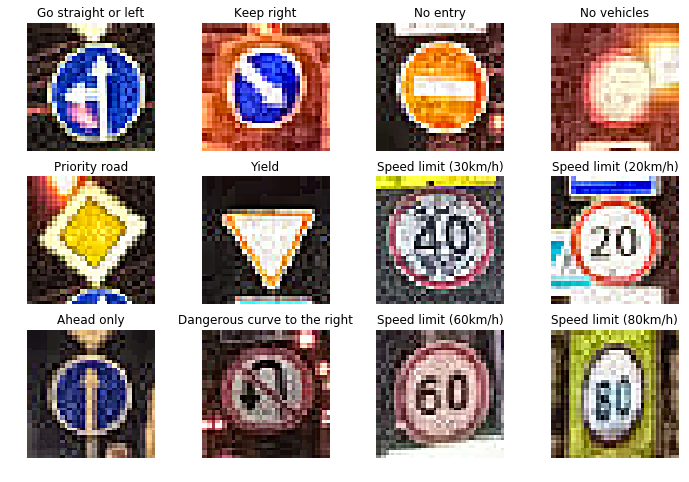

In [70]:
plt.figure(figsize=(12, 8))
for i in range(len(test)):
    plt.subplot(3, 4, i+1)
    plt.imshow(test[i]) 
    plt.title(signs_class[my_labels[i]])
    plt.axis('off')
plt.show()


In [71]:
#Normalizing the new test data.
test_images=(test_images-np.mean(test_images))/255.0


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 

I have used two sets of Images with two different qualities.

One set is randomly downloaded images with different resolutions and noises, not particularly belonging or seem simlar to German Traffic Sign Classification Dataset. This should make the classification hard.

Second one is high quality images, more or less similar to German Traffic Sign examples. This should be easy to classify.

In [74]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./Trained Model/final_model.ckpt.meta')
    saver2.restore(sess, "./Trained Model/final_model.ckpt")
    new_test_accuracy = evaluate(test_images, test_images_labels)
    print("New Test Set Accuracy = {:.3f}".format(new_test_accuracy))


New Test Set Accuracy = 0.500


Note: I will discuss the new test set accuracy at the end

In [76]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./Trained Model/final_model.ckpt.meta')
    saver2.restore(sess, "./Trained Model/final_model.ckpt")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: test_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: test_images, keep_prob: 1.0})
print(len(test))


12


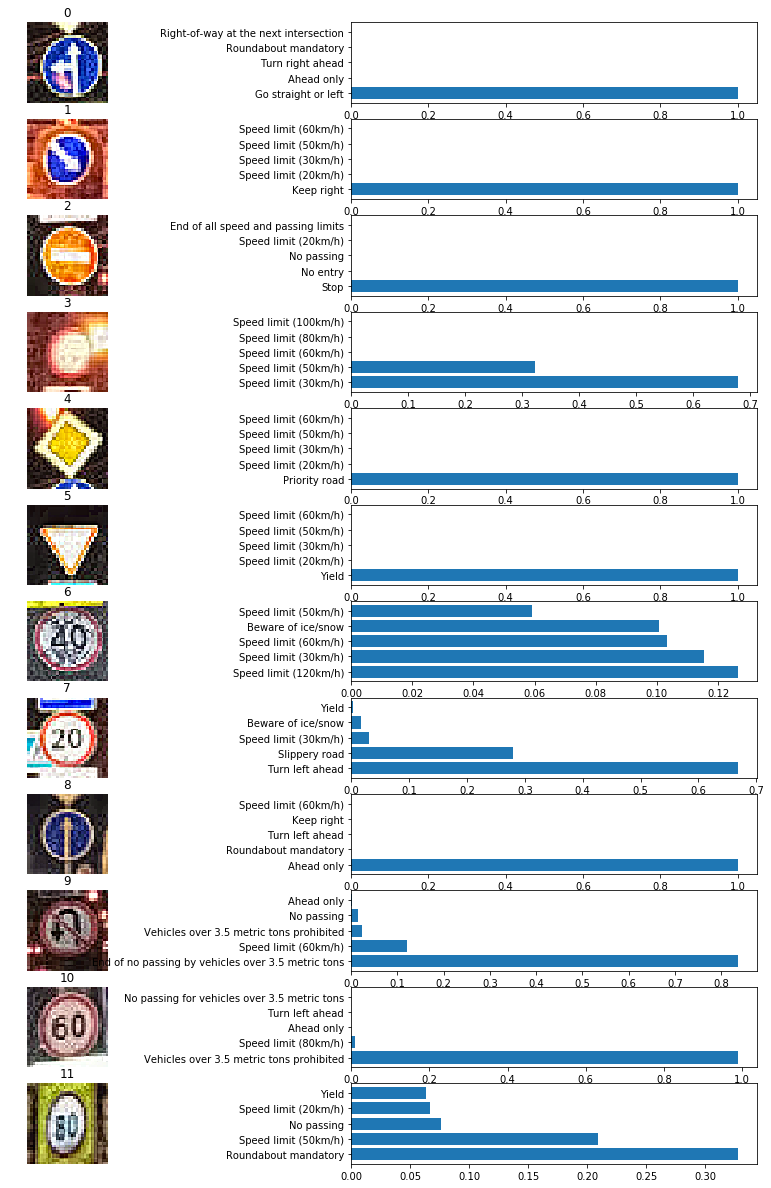

In [77]:
plt.figure(figsize=(16, 21))
for i in range(12):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(test[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), my_top_k.values[i, :])
    labs=[signs_class[j] for j in my_top_k.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()


These images taken were not a part of German traffic signs also are not in good quality so the model tried 
its best to take some of its best approximations. 

**Now Lets see how our model behaves to some of Traffic Signs in Germany and having some good quality images.**

In [80]:
my_labels = [3, 11, 1, 12, 38, 34, 18, 25]
test = []
for i, img in enumerate(glob.glob('./new_test/*x.png')):
    image = func.crop_img(cv2.imread(img))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test.append(image)


In [82]:
test_images=X_test_data=np.uint8(np.zeros((len(test),51,51,3)))
test_images_labels=np.ndarray(shape=[len(test)],dtype=np.uint8)
test_images[0:len(test)]=test[0:len(test)]
test_images_labels[0:len(test)]=my_labels[0:len(test)]


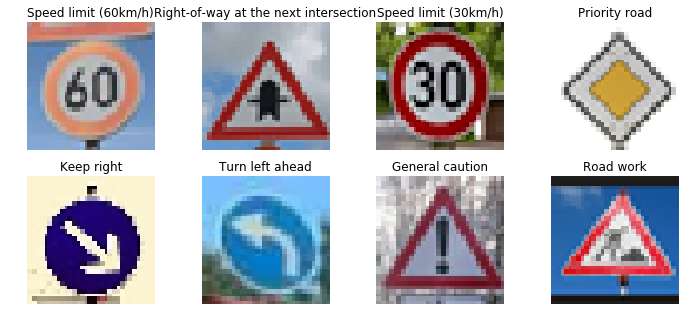

In [83]:
plt.figure(figsize=(12, 8))
for i in range(len(test)):
    plt.subplot(3, 4, i+1)
    plt.imshow(test[i]) 
    plt.title(signs_class[my_labels[i]])
    plt.axis('off')
plt.show()


In [84]:
test_images=(test_images-np.mean(test_images))/255.0


In [88]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./Trained Model/final_model.ckpt.meta')
    saver2.restore(sess, "./Trained Model/final_model.ckpt")
    new_test_accuracy = evaluate(test_images, test_images_labels)
    print("New Test Set Accuracy = {:.3f}".format(new_test_accuracy))


New Test Set Accuracy = 1.000


### Hooray ! 
All of the images are classified correctly. 
Now lets see their softmax probabliities. 

In [89]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


In [90]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./Trained Model/final_model.ckpt.meta')
    saver2.restore(sess, "./Trained Model/final_model.ckpt")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: test_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: test_images, keep_prob: 1.0})


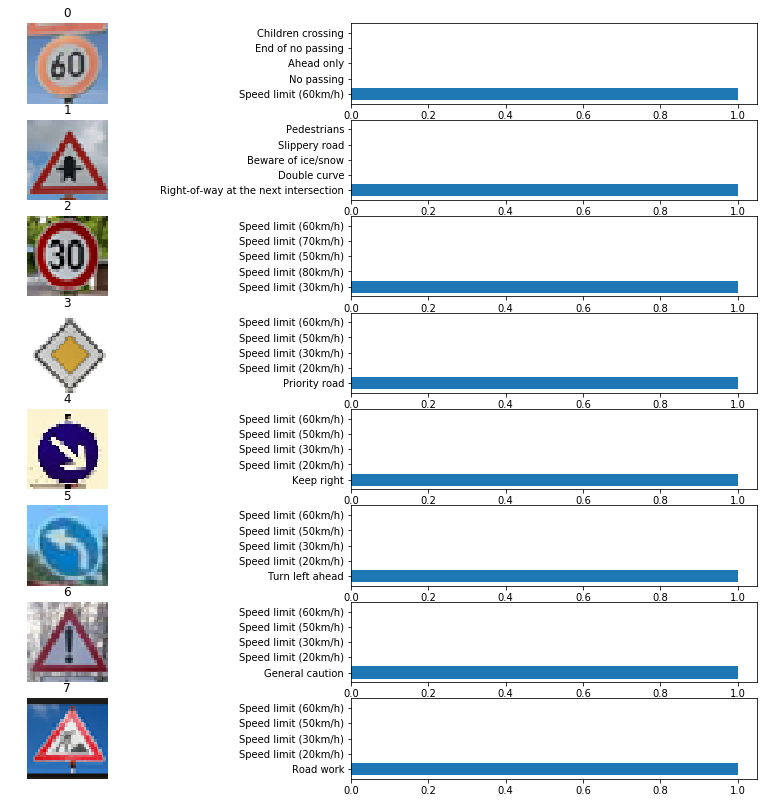

In [91]:
plt.figure(figsize=(16, 21))
for i in range(len(test)):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(test[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), my_top_k.values[i, :])
    labs=[signs_class[j] for j in my_top_k.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Yes This model was able to perform very well.
I proved this with two new sets of example images, in which i included the images which was not a part of training process like speed limit 40 Km/h, is quite rough image which at first instance look like Ice or Snow sign if we dont look at 40 and the model perfomed quite well on that.
Apart from that the second set was identified correctly. On all of the outputs the model is quite sure of the classified class. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

This model is more than 95% is certain on new images similar to the training data. 
I have shown this by using two different sets of images. If we do not consider the images not a part of training the the model identifies more than 80% accuracy. For second set of images similar to German Traffic Signs this model is 100% certain of the accuracy.